<a href="https://colab.research.google.com/github/kubadomi/DataScience_MachineLearning/blob/master/probabilistic_programming/Programowanie_porbabilistyczne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model opisujący ocenę filmu jako wartość losową określoną rozkładem normalnym. Każdy film ma inną średnią `mu_movie` (którą możemy traktować jako rzeczywistą jakość filmu) którą jesteśmy zainteresowani. Dla uproszczenia zakładamy tę samą wariancję:
```
sigma_movie = pm.Gamma('sigma_movie', alpha=10, beta=5)
mu_movie = pm.Normal('mu_movie', mu=0.0, sigma=sigma_movie, shape=n_movies)
```
Zapisując to matematycznie odchylenie standardowe:

$\sigma_{movie} \sim \Gamma(10, 5)$

średnia dla filmu $i$:

$\mu_i \sim N(0, \sigma_{movie})$

Ocena filmu $i$ z gatunku $g$ przez osobę $o$:

$\mathit{O}_{i,o,g} \sim N(\mu_i, \sigma_{movie})$

Każde $\mathit{O}_{i,o,g}$ odpowiada pojedynczemu rekordowi w danych.

Podane trzy filmy z najwyższymi ocenami i trzy z najniższymi ocenami.

In [21]:
!pip install arviz 
!pip install 'pymc3==3.8'

import numpy as np
import pymc3 as pm
import arviz
import pandas as pd

In [22]:
csv_file = open("dataframe 27.csv")
df = pd.read_csv(csv_file)
df


,Unnamed: 0,movie,person,genre,like
0,0,28,19,0,2.179648
1,1,185,10,4,-2.207078
2,2,17,19,4,-7.202695
3,3,67,22,0,-2.129677
4,4,121,8,1,0.359685
...,...,...,...,...,...
2495,2495,93,14,2,-10.507497
2496,2496,176,12,4,-4.869472
2497,2497,100,15,1,0.993246
2498,2498,33,7,4,5.608549


In [23]:
df = df.drop(df.columns[[0]], axis=1)
df

,movie,person,genre,like
0,28,19,0,2.179648
1,185,10,4,-2.207078
2,17,19,4,-7.202695
3,67,22,0,-2.129677
4,121,8,1,0.359685
...,...,...,...,...
2495,93,14,2,-10.507497
2496,176,12,4,-4.869472
2497,100,15,1,0.993246
2498,33,7,4,5.608549


In [24]:
display(df.describe())

,movie,person,genre,like
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,99.955600,12.006400,2.198000,-1.327533
std,57.779597,7.228171,1.559156,4.586159
min,0.000000,0.000000,0.000000,-15.644994
25%,50.000000,6.000000,1.000000,-4.520717
50%,101.000000,12.000000,2.000000,-1.339479
75%,150.000000,18.000000,4.000000,1.895746
max,199.000000,24.000000,4.000000,12.657538


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu_movie, sigma_movie]
Sampling chain 1, 0 divergences: 100%|██████████| 6000/6000 [00:18<00:00, 326.87it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


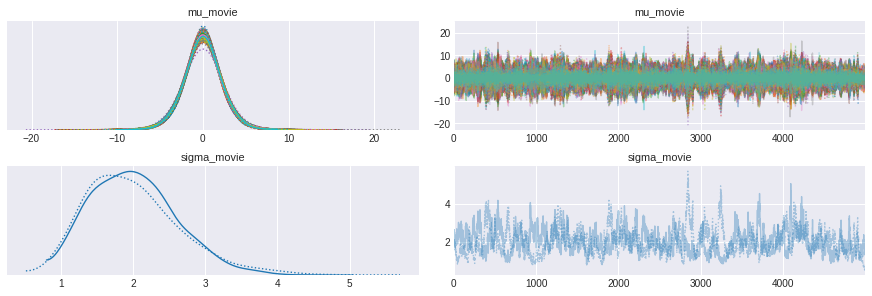

In [25]:
n_movies = 200

with pm.Model() as film_model:
    
    # ustawianie modelu 
    sigma_movie = pm.Gamma('sigma_movie', alpha=10, beta=5)
    mu_movie = pm.Normal('mu_movie', mu=0.0, sigma=sigma_movie, shape=n_movies)
    
    trace = pm.sample(5000, tune=1000, target_accept=.9)
    # rysujemy wynik
    pm.traceplot(trace);


In [26]:
# tabela summary
summary = pm.summary(trace)[:-1]
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_movie[0],-0.019,2.130,-4.001,4.243,0.016,0.041,17463.0,1371.0,17599.0,2934.0,1.00
mu_movie[1],-0.007,2.124,-4.118,4.011,0.016,0.050,17602.0,915.0,17441.0,3150.0,1.00
mu_movie[2],-0.008,2.126,-4.045,3.963,0.016,0.044,17518.0,1156.0,17858.0,2657.0,1.00
mu_movie[3],-0.008,2.133,-4.136,3.998,0.016,0.041,18445.0,1341.0,18118.0,3927.0,1.00
mu_movie[4],-0.015,2.138,-4.124,4.014,0.016,0.047,16991.0,1023.0,16897.0,2928.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...
mu_movie[195],-0.011,2.105,-4.016,4.022,0.016,0.043,16796.0,1182.0,17514.0,3222.0,1.00
mu_movie[196],0.008,2.151,-4.184,4.074,0.016,0.042,19247.0,1291.0,19474.0,3199.0,1.00
mu_movie[197],-0.003,2.132,-4.202,4.003,0.015,0.049,20228.0,937.0,20214.0,3220.0,1.01
mu_movie[198],0.019,2.124,-3.826,4.212,0.016,0.042,18180.0,1281.0,17446.0,3373.0,1.00


In [27]:
# 3 najwyższe i najniższe średnie
display(summary.sort_values('mean').head(3))
display(summary.sort_values('mean').tail(3))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_movie[36],-0.039,2.122,-4.315,3.873,0.018,0.040,14649.0,1396.0,14964.0,3422.0,1.0
mu_movie[143],-0.036,2.086,-4.055,3.912,0.017,0.041,15879.0,1280.0,16316.0,3646.0,1.0
mu_movie[181],-0.035,2.085,-4.195,3.863,0.016,0.039,17572.0,1456.0,17607.0,4517.0,1.0


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_movie[20],0.037,2.108,-4.181,3.942,0.016,0.045,16991.0,1100.0,16899.0,2608.0,1.0
mu_movie[48],0.041,2.125,-4.026,4.113,0.016,0.046,17413.0,1079.0,17477.0,3220.0,1.0
mu_movie[10],0.052,2.144,-4.263,4.048,0.017,0.045,15702.0,1134.0,15766.0,2931.0,1.0
